In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
#read in tet2 patients
p08a=sc.read_h5ad('16H008_allsorted_cleaned.h5')
p89a=sc.read_h5ad('08H089_allsorted_cleaned.h5')
p7a=sc.read_h5ad('AML7_allsorted_cleaned.h5')
p72a=sc.read_h5ad('10H072_allsorted_cleaned.h5')

In [10]:
ad = p89a
sc.pp.filter_genes(ad, min_counts=None, min_cells=ad.shape[0]*.05)

tfs=pd.read_csv("Human_TF_MotifList_v_1.01.txt",sep='\t')
import numpy as np
tfs_in=[]
for i in tfs["HGNC symbol"]:
    if i in ad.var_names:
        tfs_in.append(i)
tfs_in=np.unique(tfs_in)

In [4]:
sc.pp.calculate_qc_metrics(p89a, inplace=True)

# UPDATE OBS WITH USE

# store the current 'total_counts' under original_total_counts, which will not automatically be updated
# by scanpy in subsequent filtering steps
p89a.obs['original_total_counts'] = p89a.obs['total_counts']

# log10 original library size
p89a.obs['log10_original_total_counts'] = np.log10(p89a.obs['original_total_counts'])
med = np.median(p89a.obs['original_total_counts'])
sc.pp.normalize_per_cell(p89a, counts_per_cell_after = med)

#log transform + 1 and updates adata.X
sc.pp.log1p(p89a)

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [43]:
def compute_mut(adata):
    fast_x = sklearn.decomposition.TruncatedSVD(100).fit_transform(adata.X)
    nn = sklearn.neighbors.NearestNeighbors(n_neighbors=30)
    nn.fit(fast_x)
    neighbors = nn.kneighbors(return_distance=False)

    npm_mut = (adata.obs["NPM1_mut"] == "mut").to_numpy()[neighbors].sum(axis=1)
    npm_wt = (adata.obs["NPM1_wt"] == "wt").to_numpy()[neighbors].sum(axis=1)
    #dnm_mut = (adata.obs["DNMT3A_mut"] == "mut").to_numpy()[neighbors].sum(axis=1)
    #dnm_wt = (adata.obs["DNMT3A_wt"] == "wt").to_numpy()[neighbors].sum(axis=1)

    npm_mut_ratio = npm_mut / (npm_mut + npm_wt + 1e-10)
    #dnm_mut_ratio = dnm_mut / (dnm_mut + dnm_wt + 1e-10)

    adata.obs["NPM1 mutation vs wild type"] = npm_mut_ratio
    #adata.obs["DNMT3A mutation vs wild type"] = dnm_mut_ratio
    return adata

p89a = compute_mut(p89a)

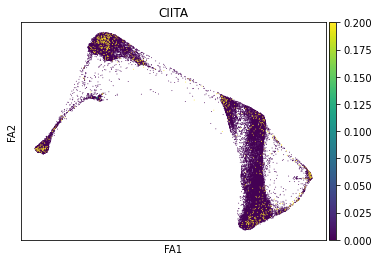

In [16]:
sc.pl.draw_graph(p89a,layout='fa',color=["CIITA"],vmax=.2)

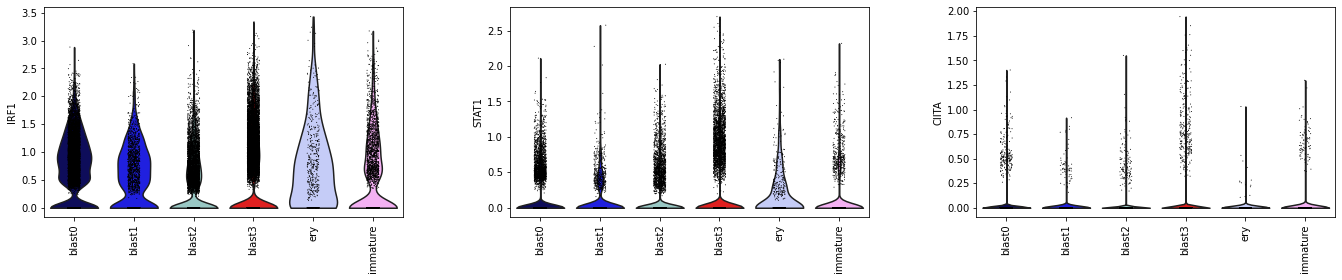

In [18]:
sc.pl.violin(p89a, keys=['IRF1',"STAT1","CIITA"], 
                 groupby="blast_cell_type_08H089", rotation=90,ncols=1)

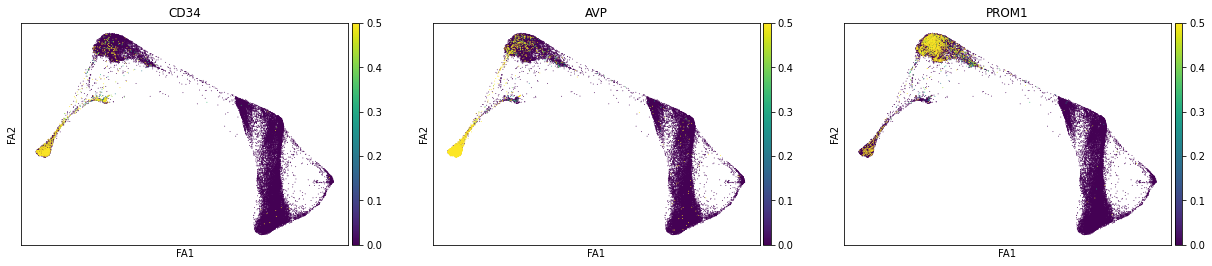

In [8]:
sc.pl.draw_graph(p89a,layout='fa',color=['CD34','AVP','PROM1'],vmax=.5)

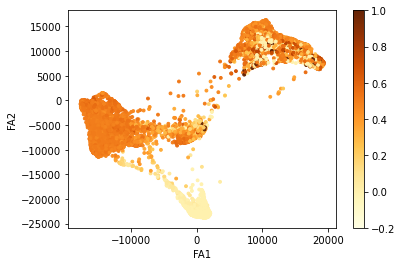

In [44]:
randomize=np.arange(p89a.shape[0])
np.random.shuffle(randomize)
x = p89a.obsm["X_draw_graph_fa"][:,0]#[randomize]
y = p89a.obsm["X_draw_graph_fa"][:,1]#[randomize]
plt.scatter(x,y,c=np.asarray(p89a.obs["NPM1 mutation vs wild type"]),cmap="YlOrBr",s=8,vmin=-.2,vmax=1,rasterized=True)
plt.xlabel("FA1")
plt.ylabel("FA2")
plt.colorbar()
#plt.savefig("AML3_mut_ratio_unfiltered.pdf")

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cell Types')

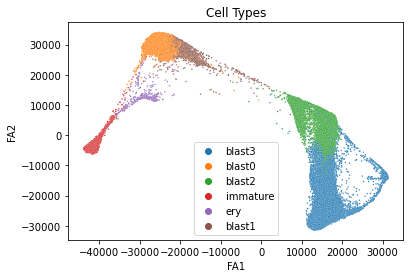

In [15]:
randomize=np.arange(p89a.shape[0])
np.random.shuffle(randomize)
x = p89a.obsm["X_draw_graph_fa"][:,0][randomize]
y = p89a.obsm["X_draw_graph_fa"][:,1][randomize]
sns.scatterplot(x,y,hue=np.asarray(p89a.obs["blast_cell_type_08H089"])[randomize],s=2)
plt.xlabel("FA1")
plt.ylabel("FA2")
plt.title("Cell Types")

In [47]:
#read in tet2 patients
p08a=sc.read_h5ad('16H008_allsorted_cleaned.h5')
p89a=sc.read_h5ad('08H089_allsorted_cleaned.h5')
p7a=sc.read_h5ad('AML7_allsorted_cleaned.h5')
p72a=sc.read_h5ad('10H072_allsorted_cleaned.h5')

/home/lf2684/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/lf2684/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [48]:
def plots(p89a, cell_key, save_str):
    ##Normalization
    sc.pp.calculate_qc_metrics(p89a, inplace=True)

    # UPDATE OBS WITH USE

    # store the current 'total_counts' under original_total_counts, which will not automatically be updated
    # by scanpy in subsequent filtering steps
    p89a.obs['original_total_counts'] = p89a.obs['total_counts']

    # log10 original library size
    p89a.obs['log10_original_total_counts'] = np.log10(p89a.obs['original_total_counts'])
    med = np.median(p89a.obs['original_total_counts'])
    sc.pp.normalize_per_cell(p89a, counts_per_cell_after = med)

    #log transform + 1 and updates adata.X
    sc.pp.log1p(p89a)
    
        
    #compute mutation ratio
    p89a = compute_mut(p89a)
    
    #sc.pl.draw_graph(p89a,layout='fa',color=['CD34','AVP','PROM1',"HOXA9"],vmax=.5,save=save_str)
    sc.pl.violin(p89a, keys=['CD34',"AVP","PROM1","HOXA9","NPM1 mutation vs wild type"], 
                 groupby=cell_key, rotation=90,ncols=1, save=save_str)
    

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


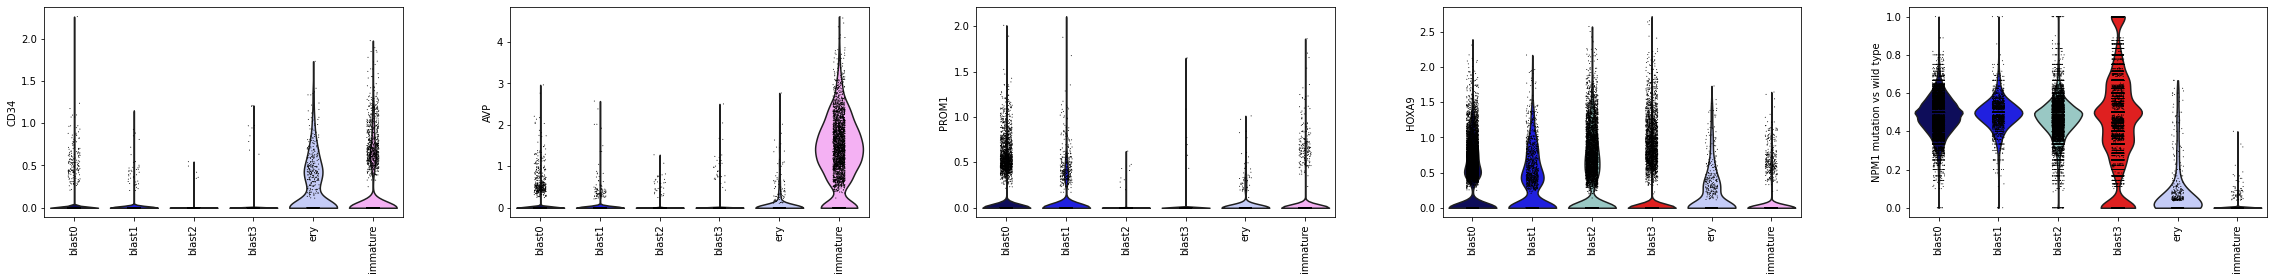

In [49]:
plots(p89a, "blast_cell_type_08H089","AML1")

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


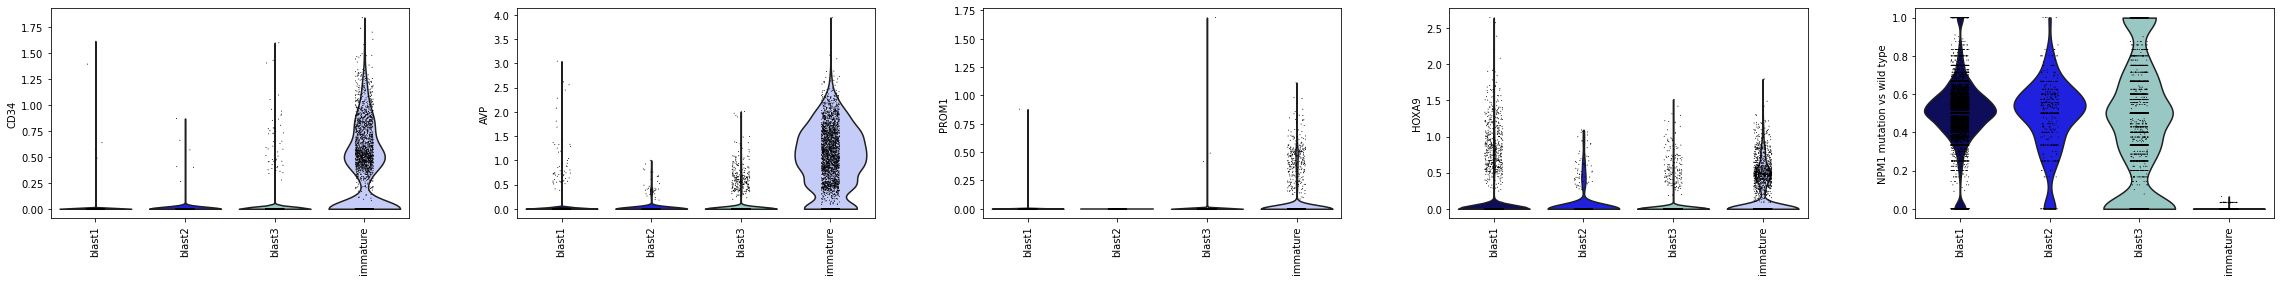

In [50]:
plots(p08a, "blast_cell_type_16H008","AML2")

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


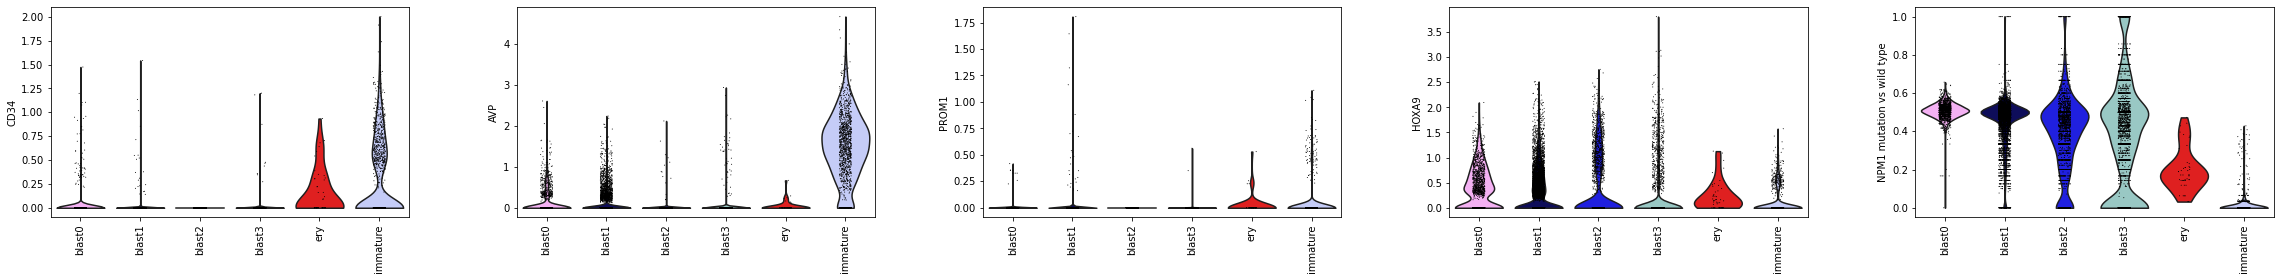

In [51]:
plots(p7a, "blast_cell_type_AML7","AML3")